In [1]:
%matplotlib inline
import pysd
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
from tqdm.auto import tqdm
import numpy as np
from seaborn import heatmap
import pandas as pd

## Модель Хищник-Жертва

### Загрузка стартовой модели

## Классическая модель системной динамики, изучающая взаимодействие популяций рысей и зайцев в ограниченном пространстве

### Задание (выполнять в отдельном .py и .ipynb файлах)

Реализовать дополнительно следующую логику:
1. Добавьте фактор человека, который охотиться как на зайцев, так и на рысей прямо пропорционально размерам их популяции (соответствующие коэффициенты $q_1$ и $q_2$ являются параметрами модели).
2. Добавьте популяцию волков, охотящихся и на рысей, и на зайцев, со своей естественной рождаемостью (константный коэффициент) и смертностью, зависящей от суммарной популяции рысей и зайцев (соответствующую табличную функцию задать самостоятельно).
3. Добавьте рысям возможность питаться естественно умершими волками (принцип падальщика). Соответствующий коэффициент $r$ сделайте параметром модели.

Вывести графики популяции всех животных по времени (можно масштабировать данные), а также вычислить математическое ожидание и дисперсию числа рысей на 100-м шаге моделирования при варьировании параметрами $q_1$, $q_2$ от $0.01$ до $0.1$ и $r$ от $0.1$ до $0.2$.

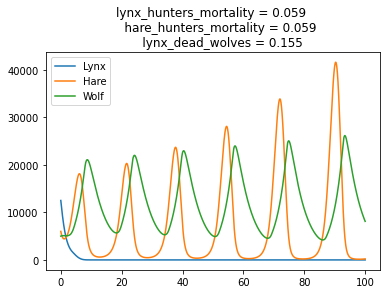

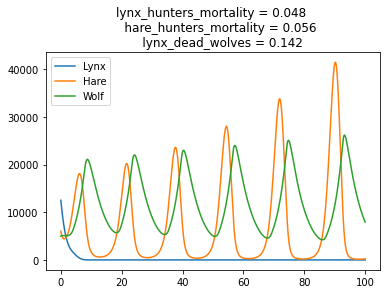

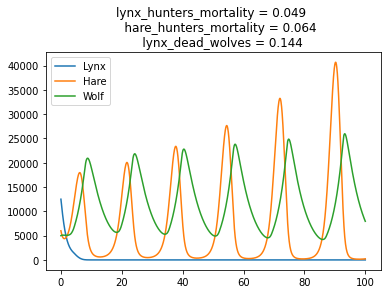

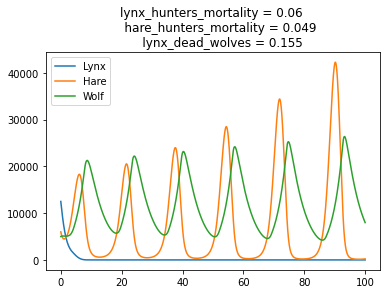

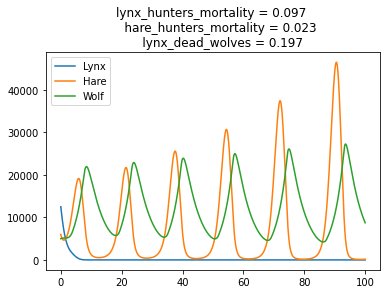

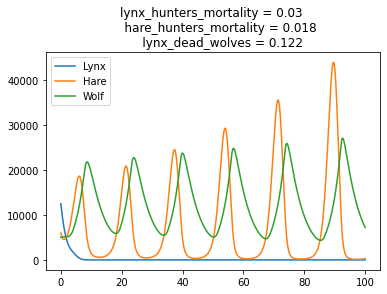

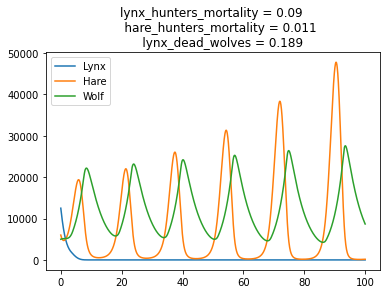

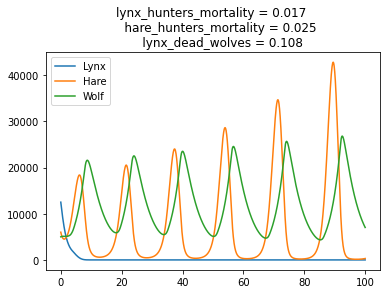

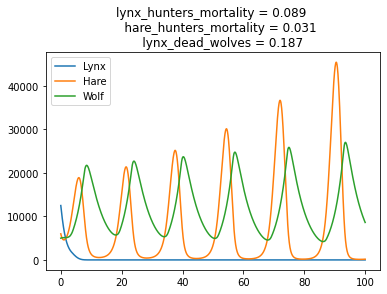

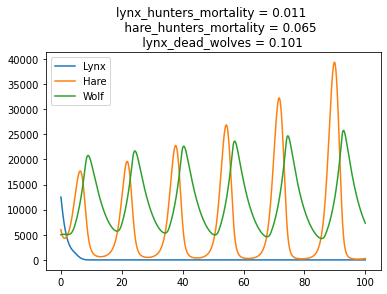

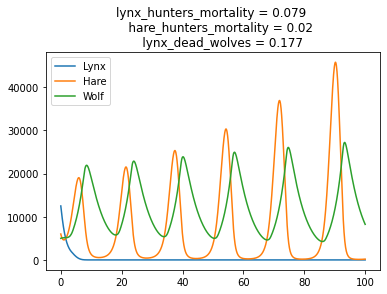

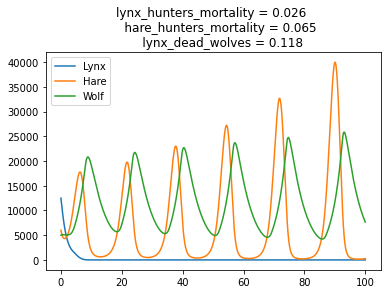

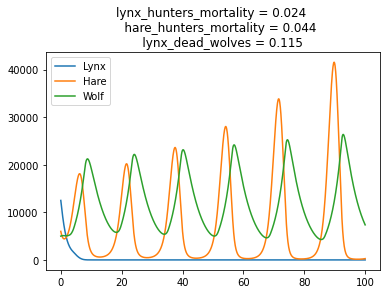

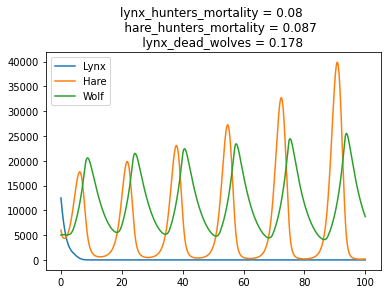

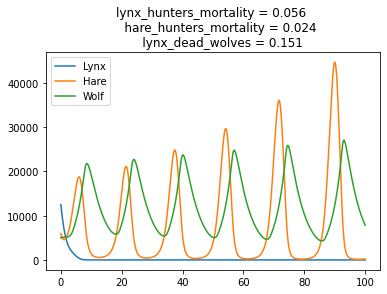

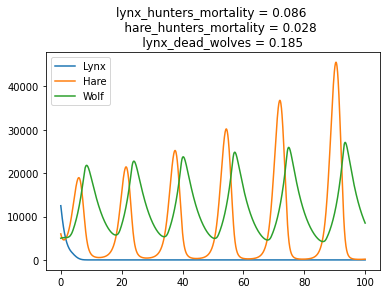

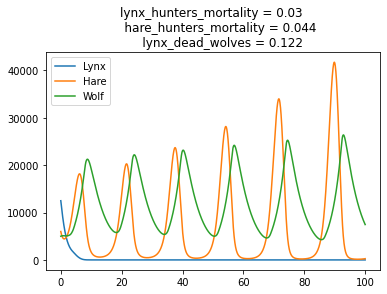

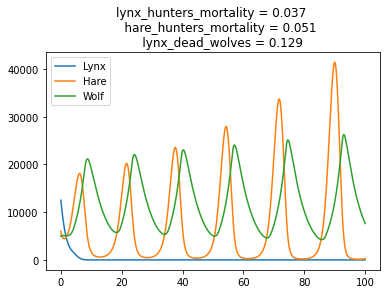

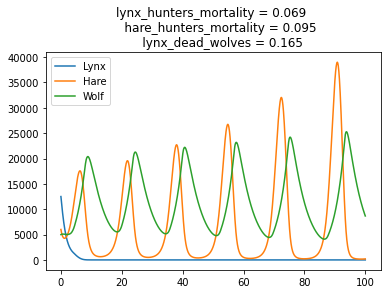

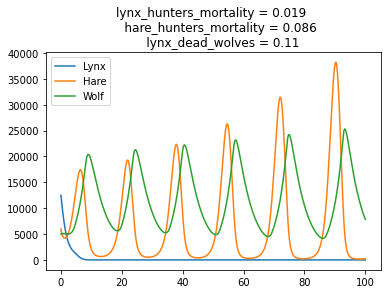

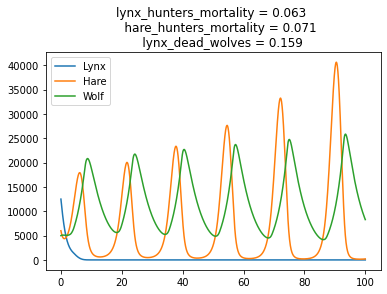

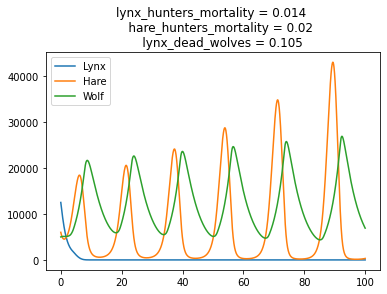

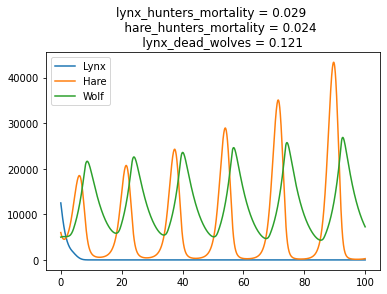

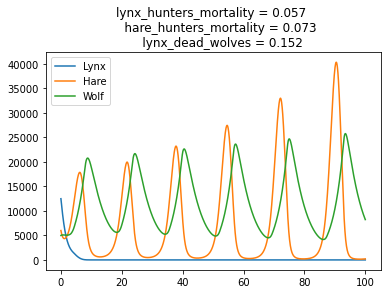

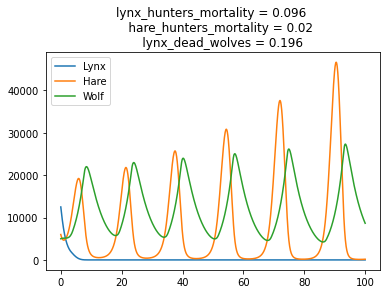

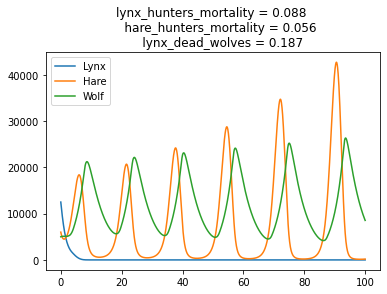

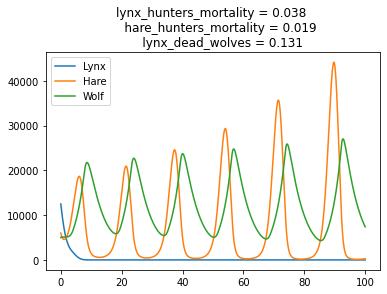

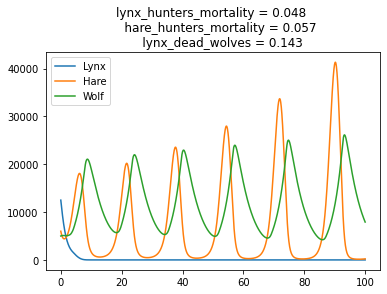

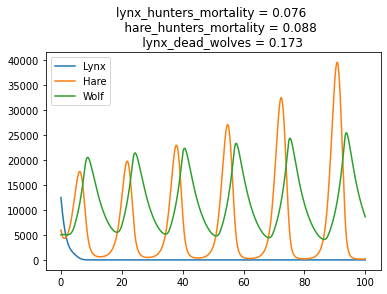

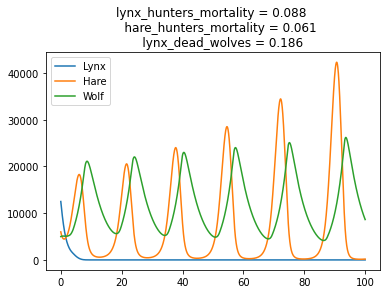

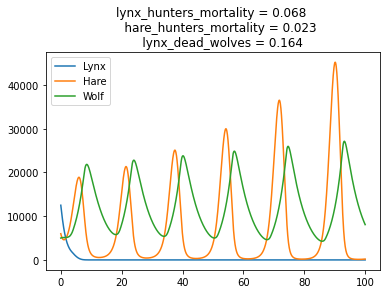

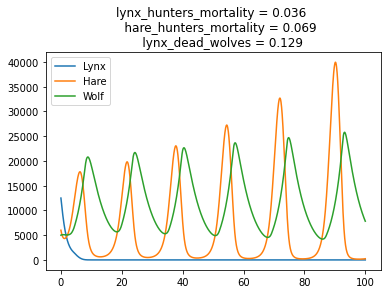

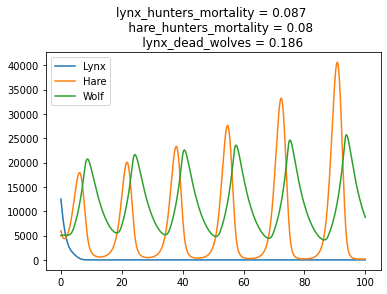

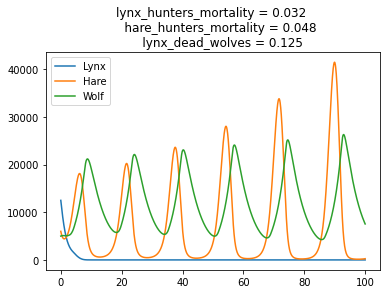

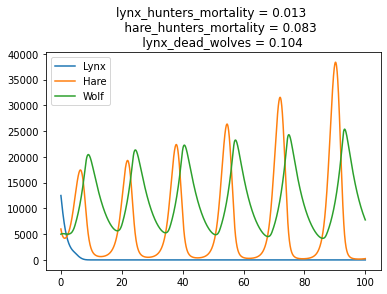

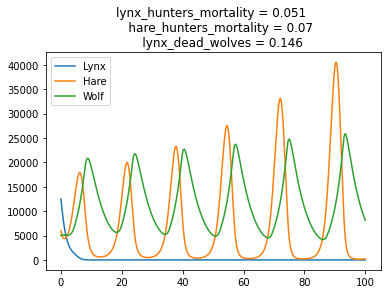

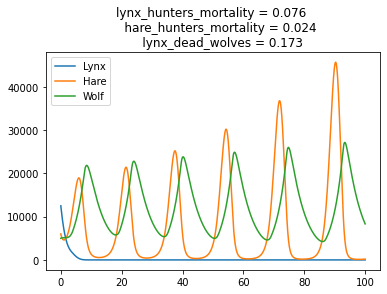

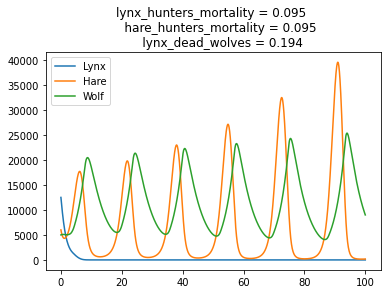

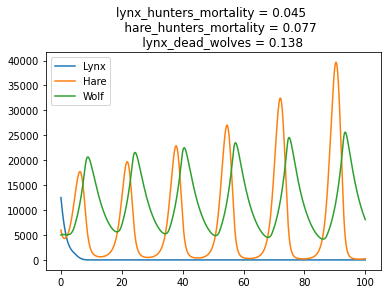

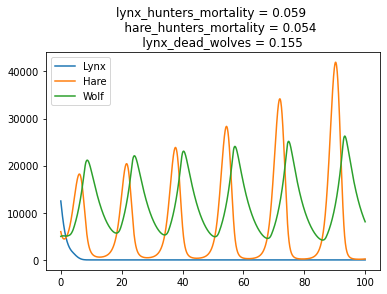

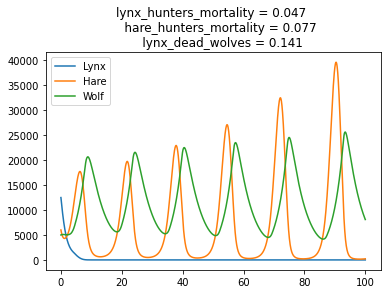

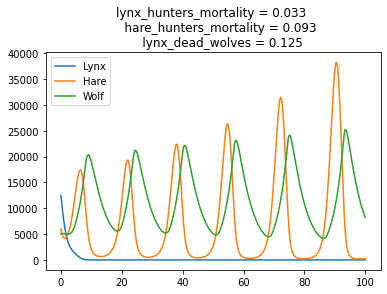

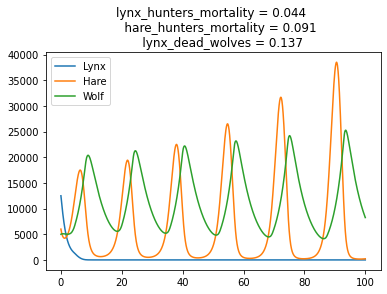

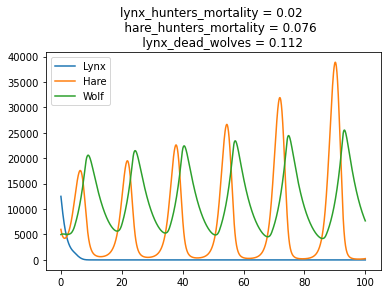

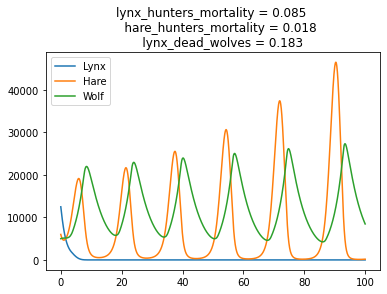

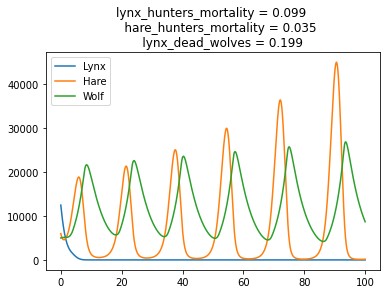

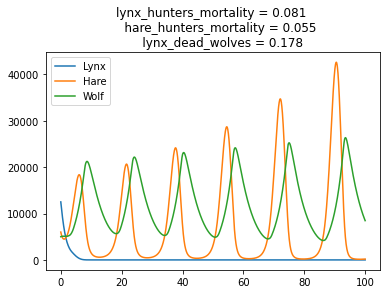

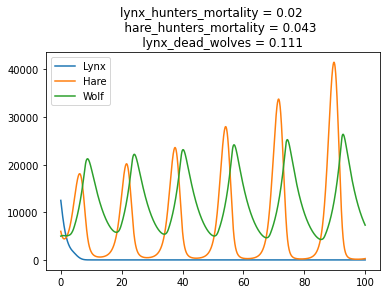

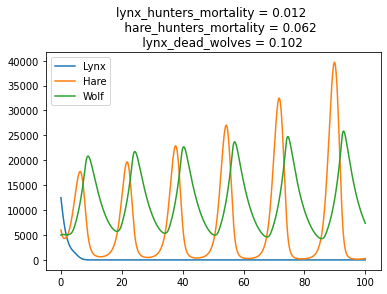

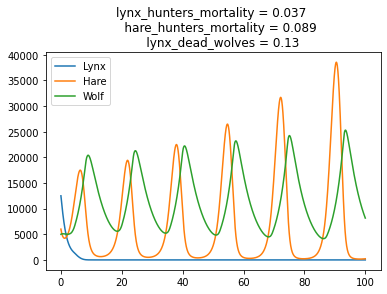

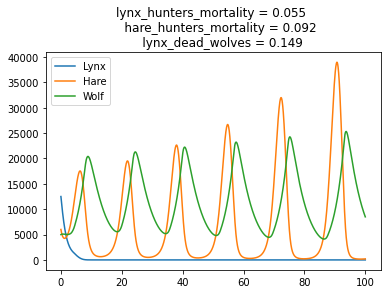

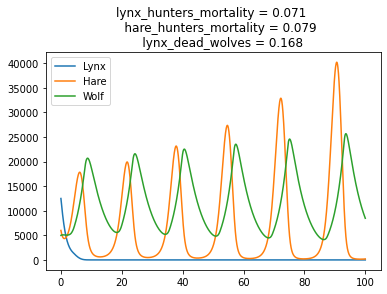

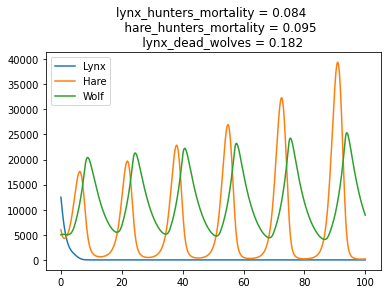

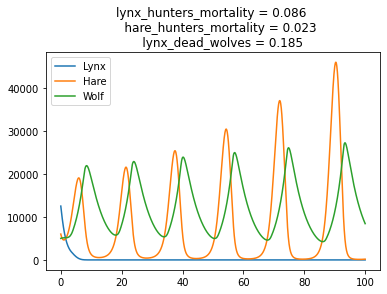

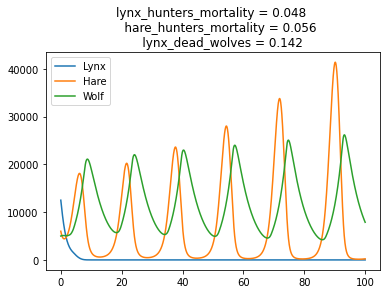

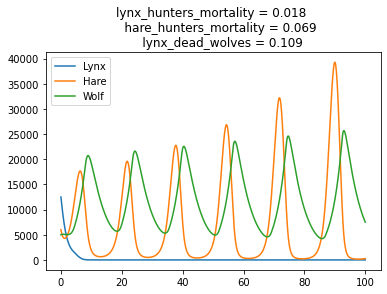

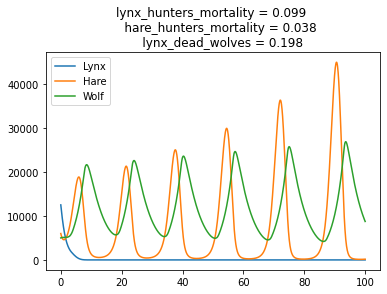

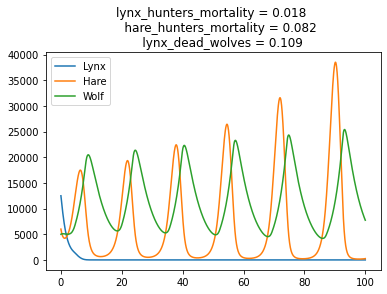

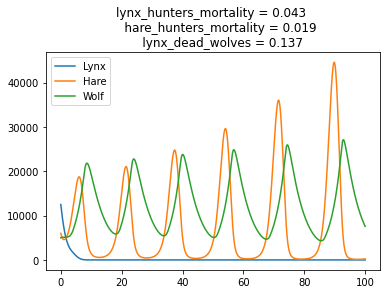

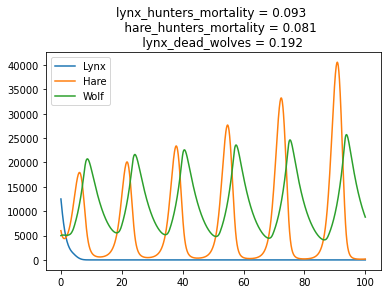

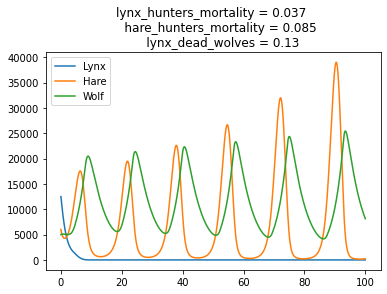

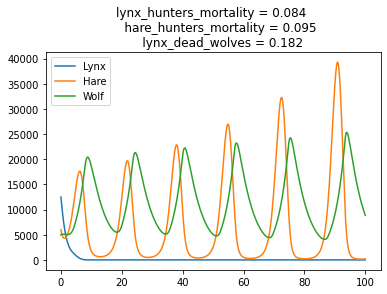

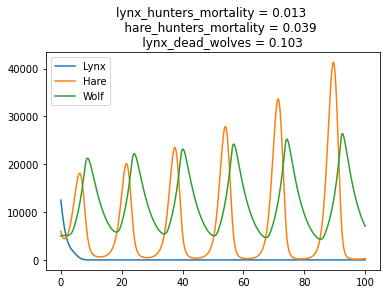

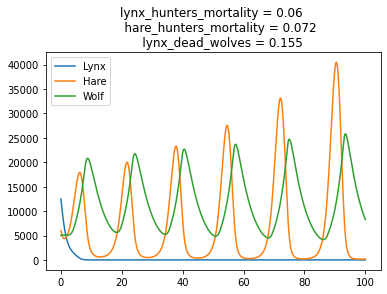

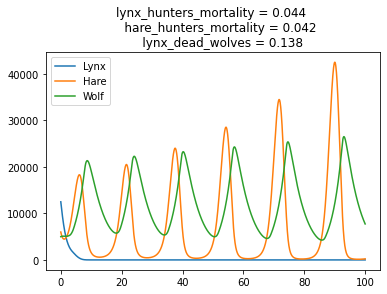

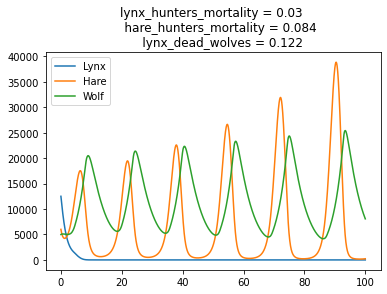

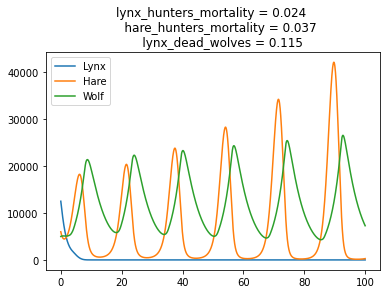

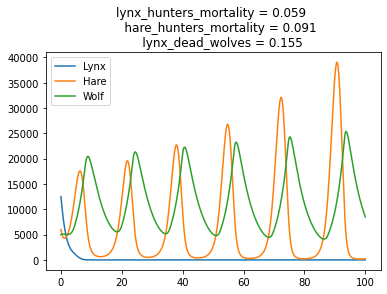

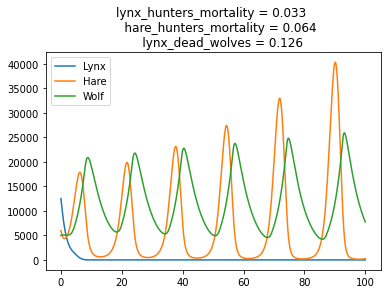

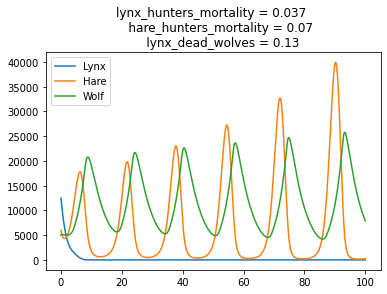

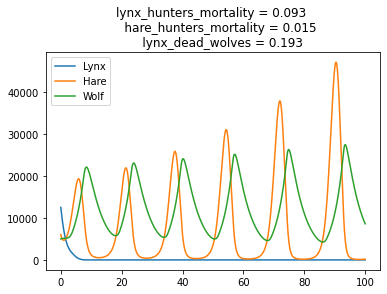

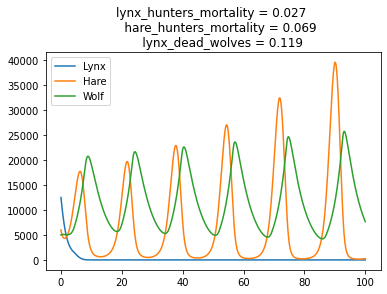

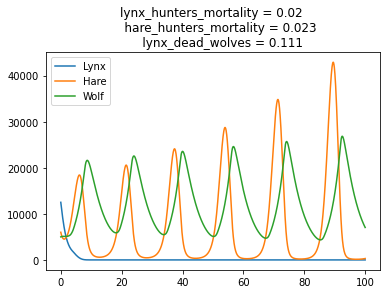

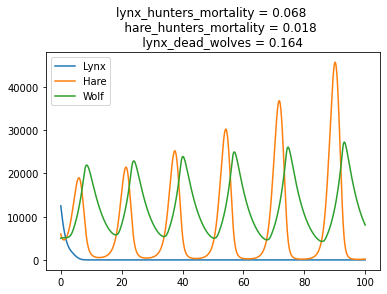

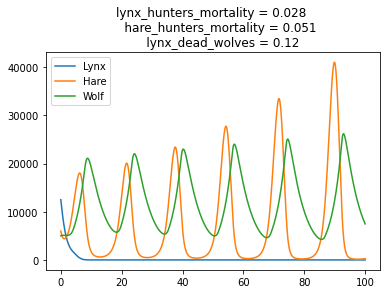

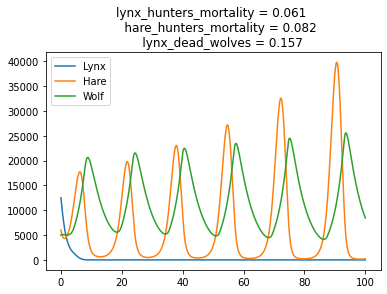

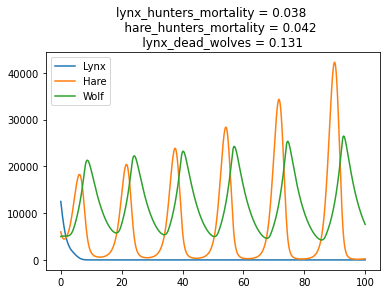

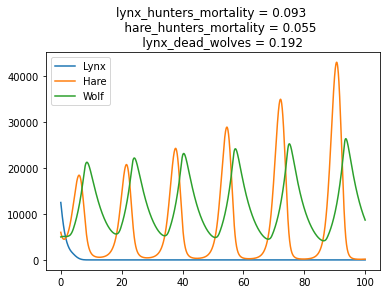

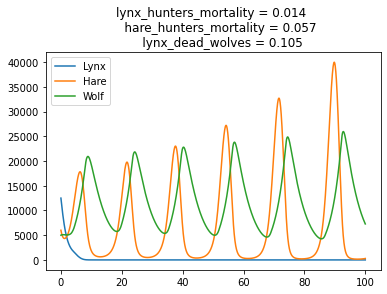

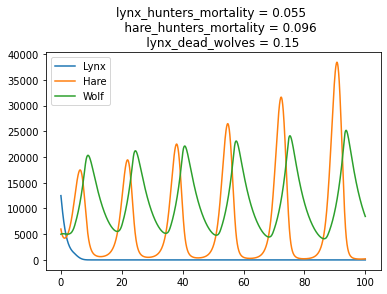

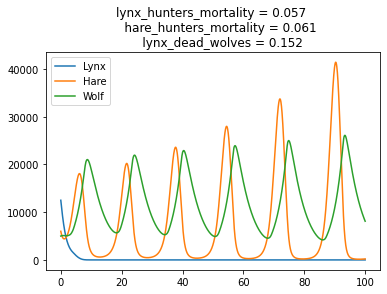

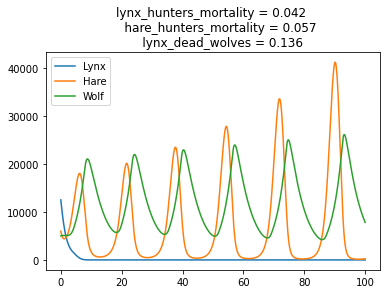

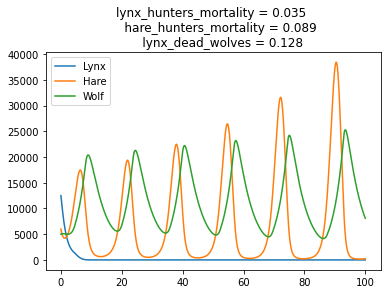

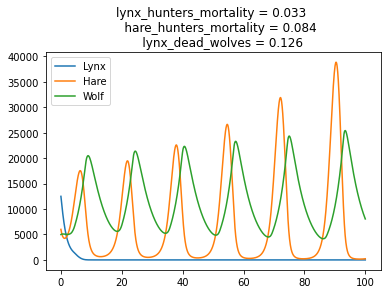

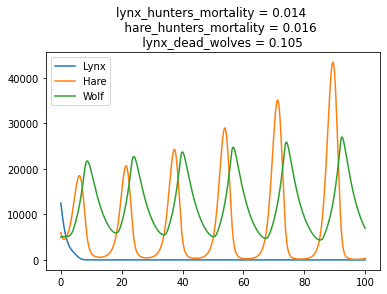

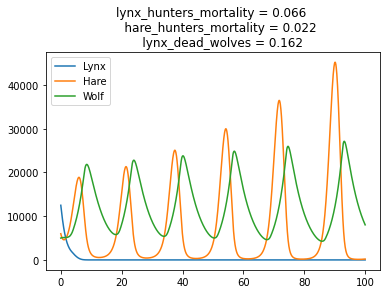

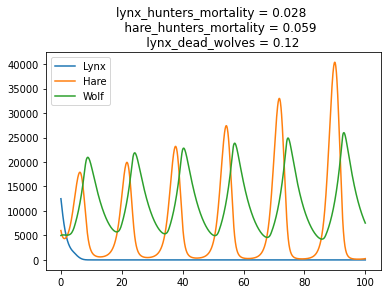

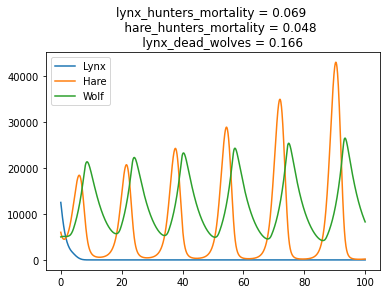

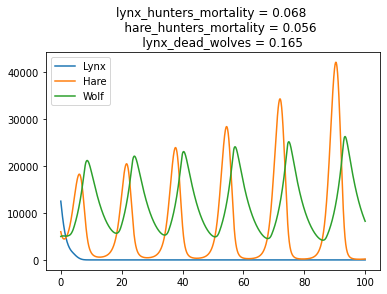

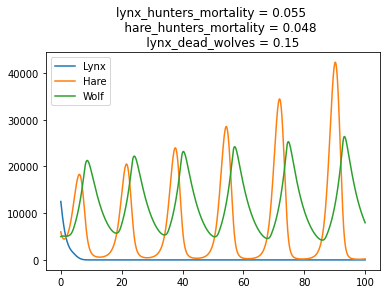

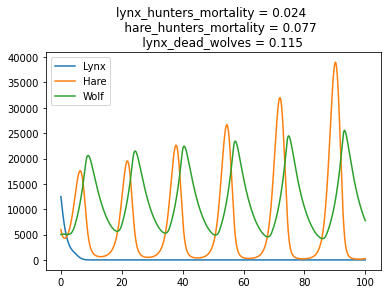

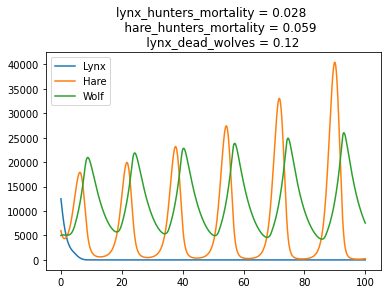

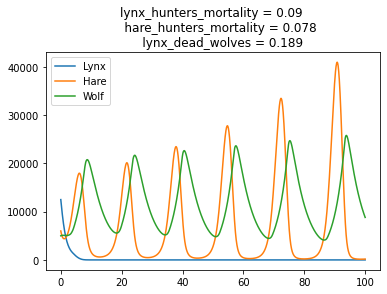

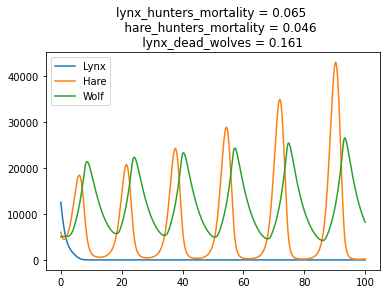

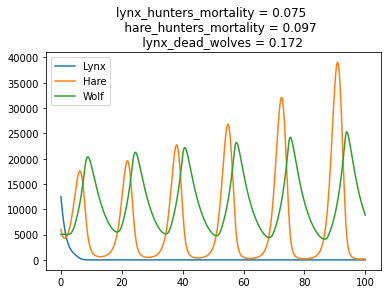

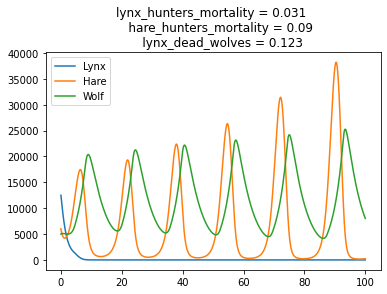

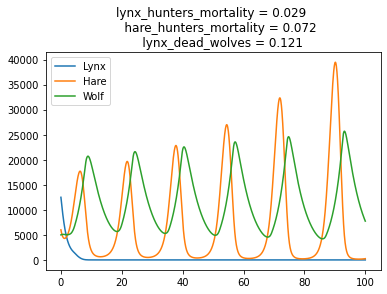

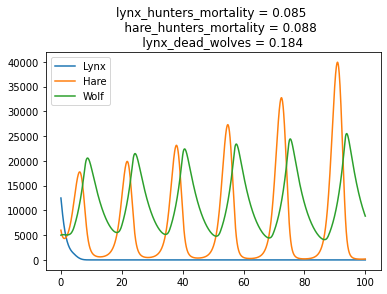

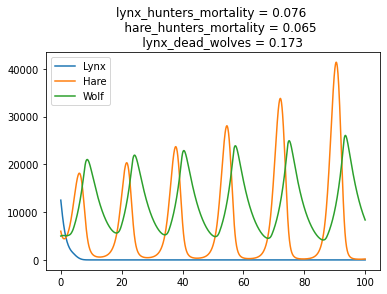

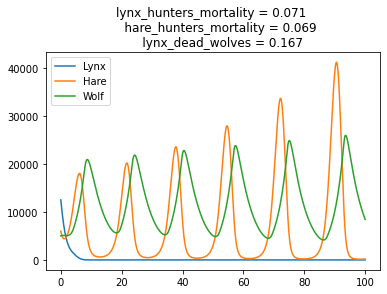

Calculation is finished. 
Mean = 0.0 
Standart deviation = 0.0



In [2]:
model = pysd.load('Lotka_Volterra.py')

lynx_100 = []

min_iter = 10
max_iter = 100
alpha = 0.05

for i in tqdm(range(max_iter)):
    
    np.random.seed(i)
    q1 = np.random.uniform(0.01, 0.1)
    np.random.seed(i+max_iter)
    q2 = np.random.uniform(0.01, 0.1)
    np.random.seed(i)
    r = np.random.uniform(0.1, 0.2)

    output = model.run(params={'lynx_hunters_mortality': q1, 'hare_hunters_mortality': q2, 'lynx_dead_wolves': r}, 
               return_columns=['Lynx', 'Hare', 'Wolf'])
    output['Lynx'] = output['Lynx'] * 100
    output['Wolf'] = output['Wolf'] * 100

    output.plot()
    plt.title(f'lynx_hunters_mortality = {np.round(q1, 3)} \n \
    hare_hunters_mortality = {np.round(q2, 3)} \n \
    lynx_dead_wolves = {np.round(r, 3)}')
    plt.show()

    if i < min_iter:
        lynx_100.append(output['Lynx'].values[-1] / 100)
        continue 
        
    _, p_value = ttest_1samp(lynx_100, 0)

    if 1 - p_value <= alpha:
        mean = np.round(np.mean(lynx_100), 4)
        std = np.round(np.std(lynx_100), 4)
        print(f'Calculation is finished. \nMean = {mean} \nStandart deviation = {std}')
        break
        
    lynx_100.append(output['Lynx'].values[-1])
    
    if i == max_iter-1: 
        mean = np.round(np.mean(lynx_100), 4)
        std = np.round(np.std(lynx_100), 4)
        print(f'Calculation is finished. \nMean = {mean} \nStandart deviation = {std}')

**Lets change initial amount of wolves and its natality**

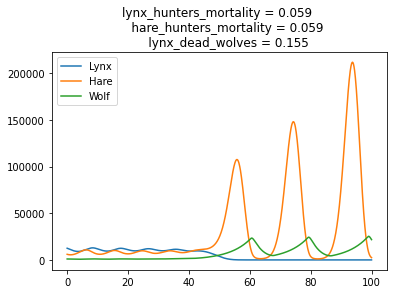

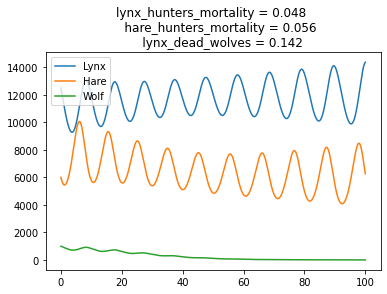

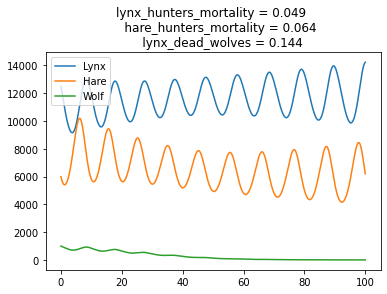

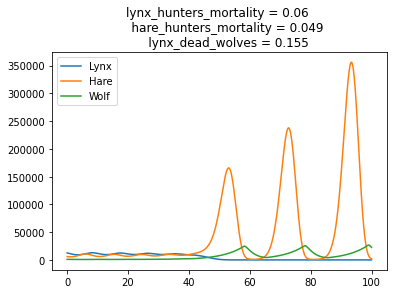

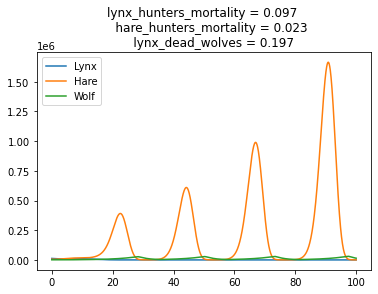

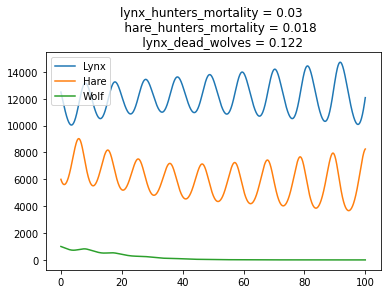

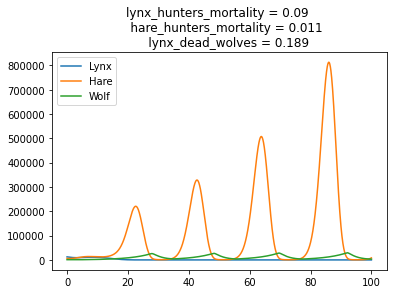

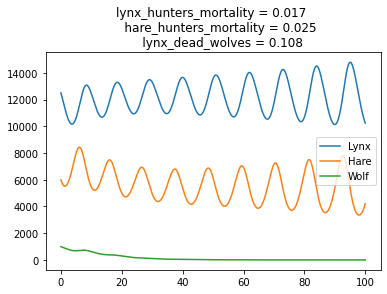

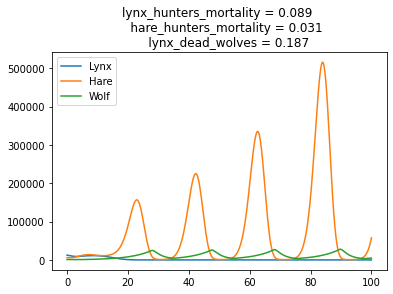

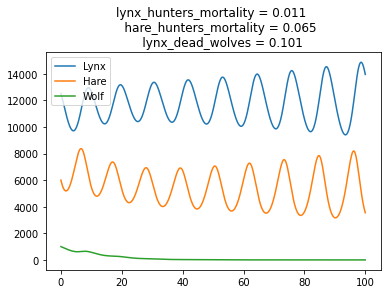

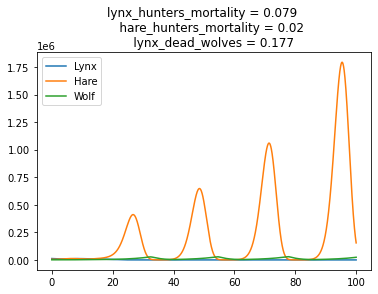

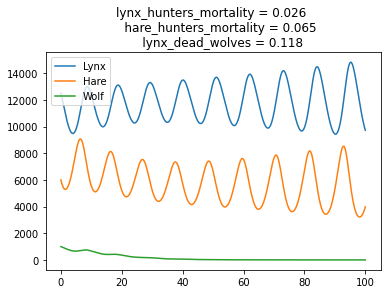

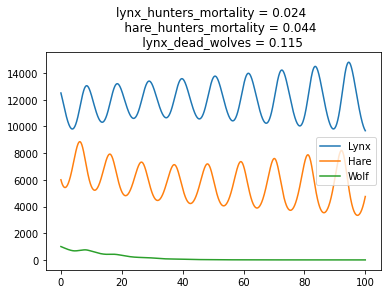

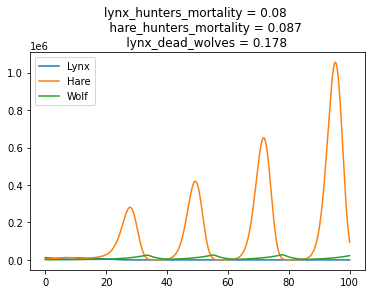

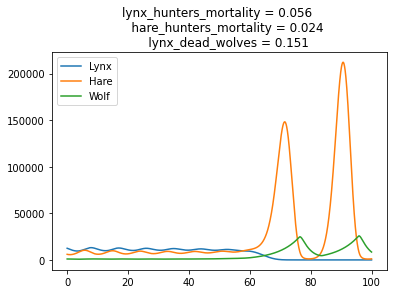

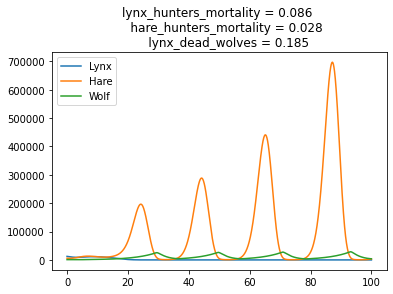

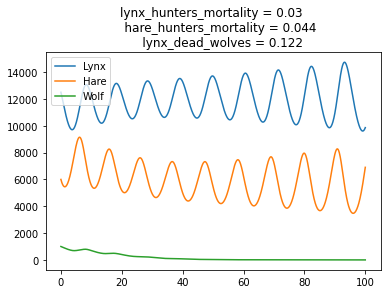

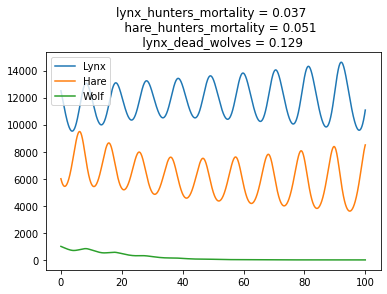

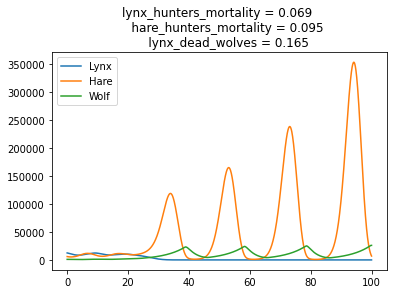

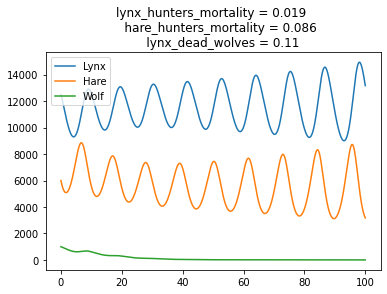

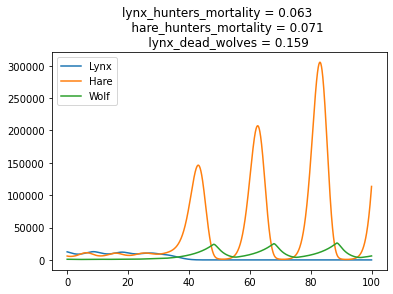

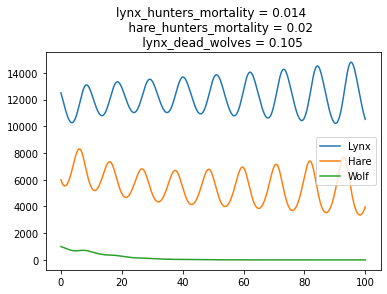

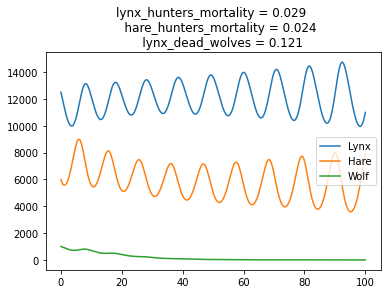

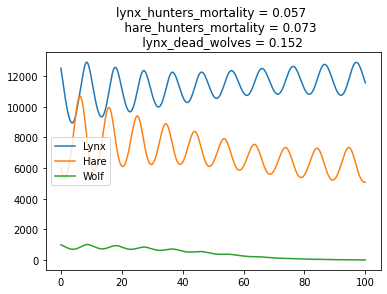

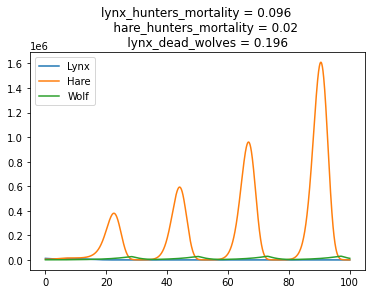

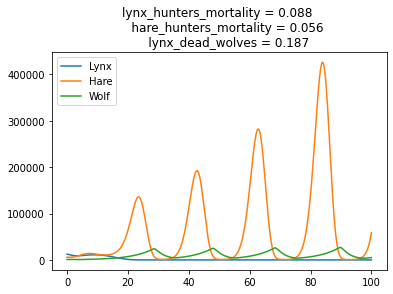

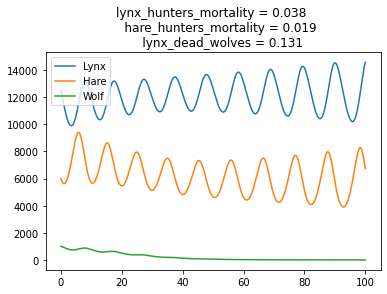

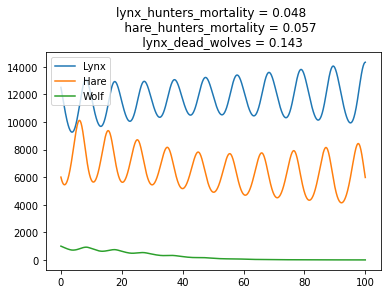

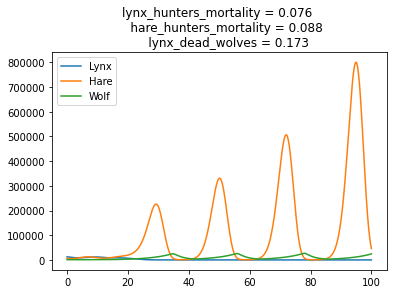

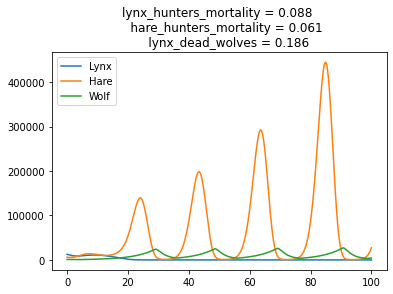

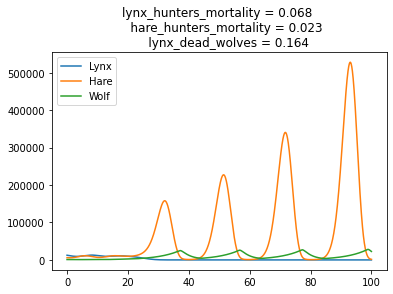

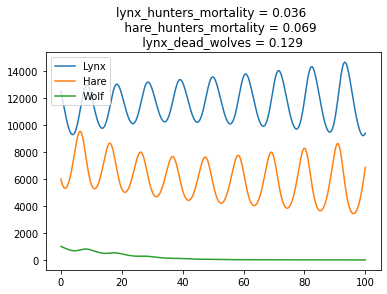

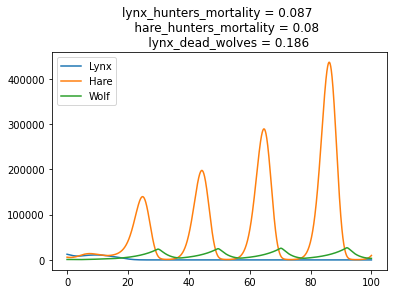

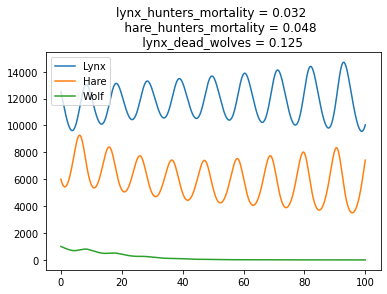

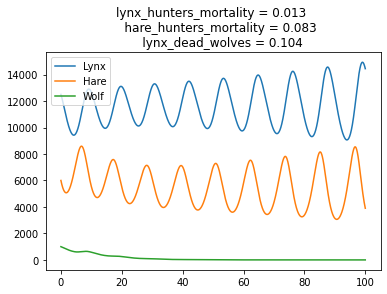

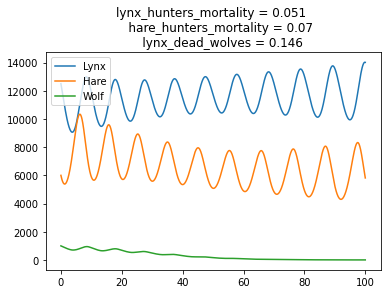

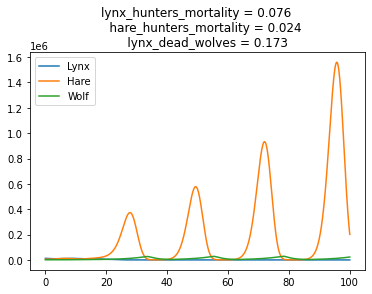

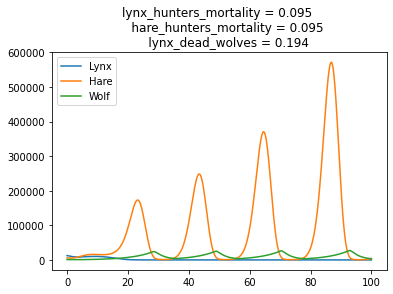

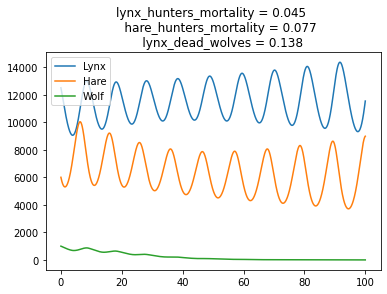

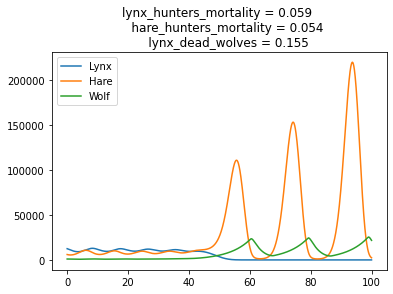

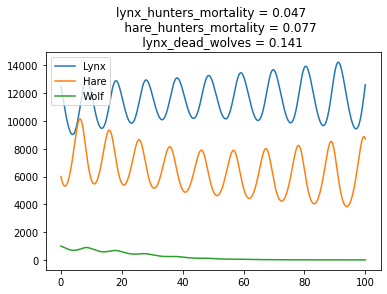

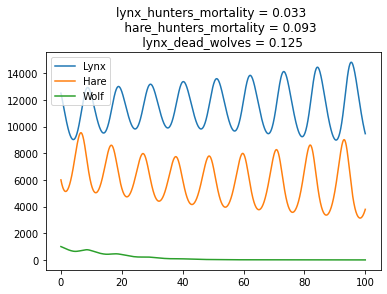

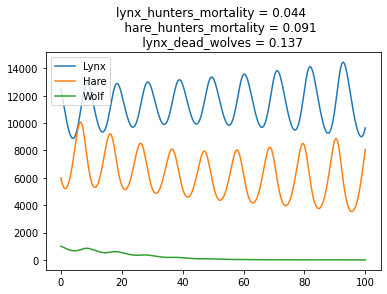

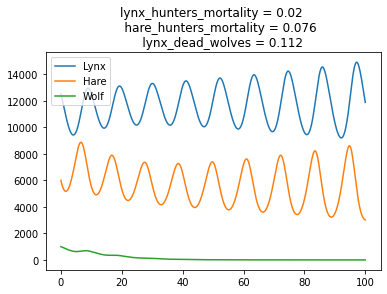

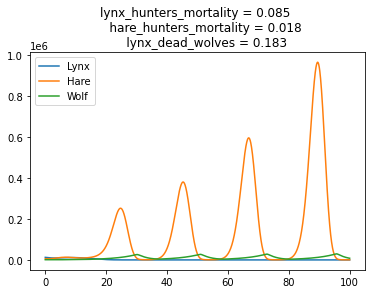

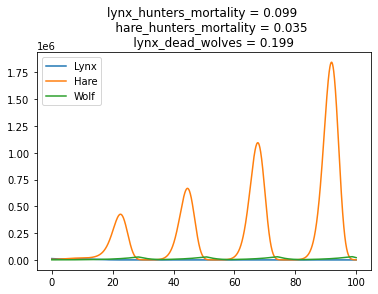

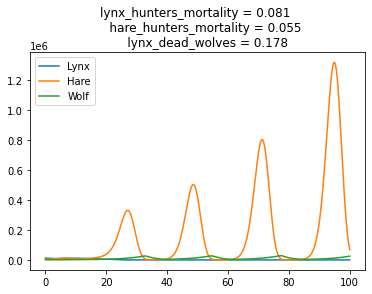

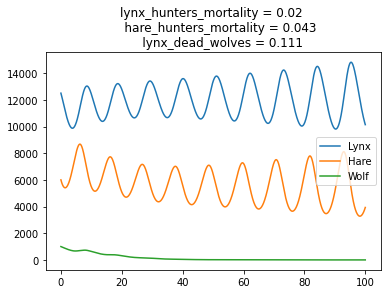

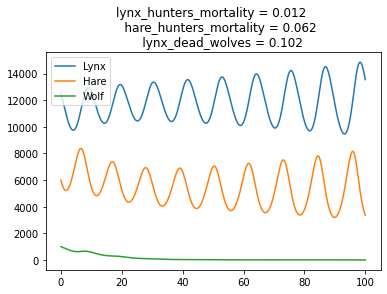

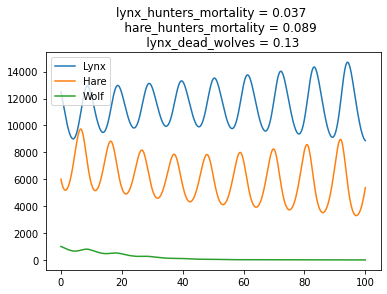

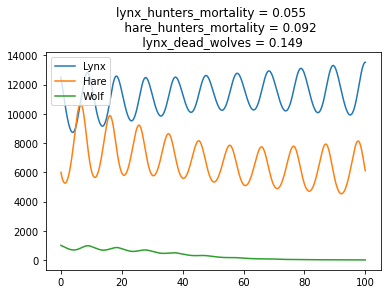

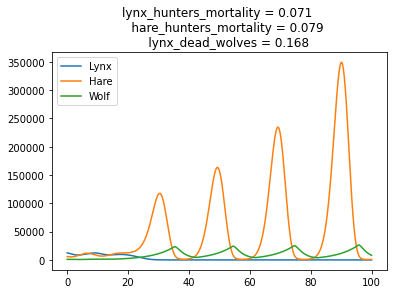

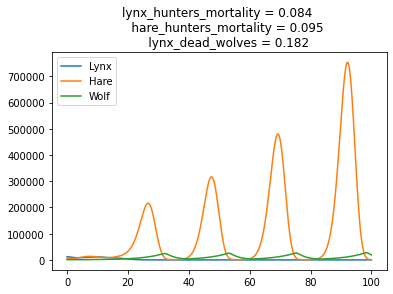

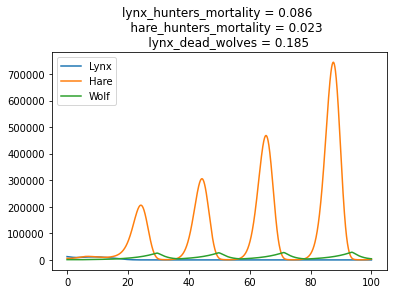

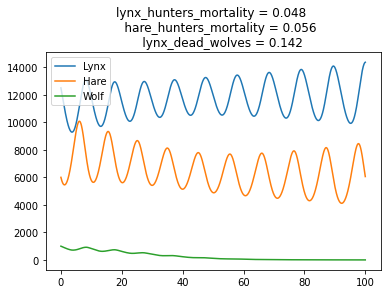

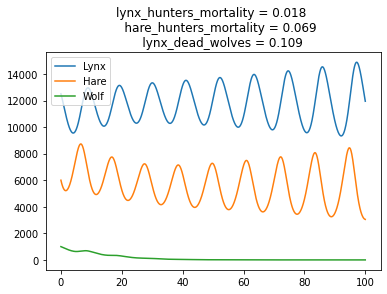

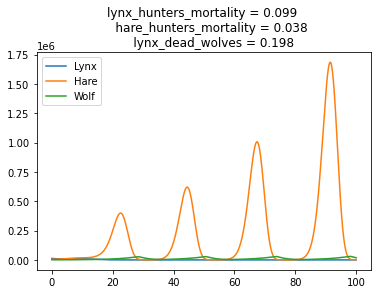

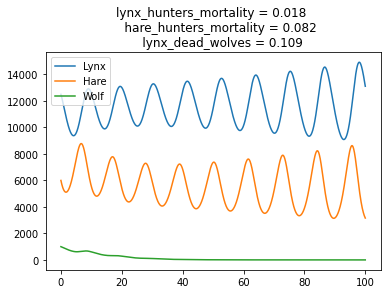

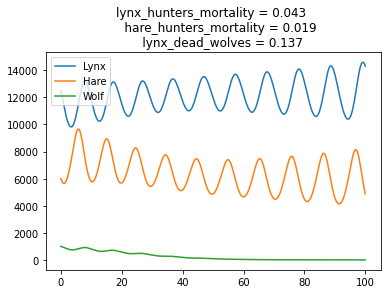

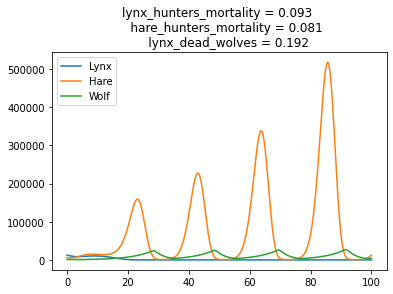

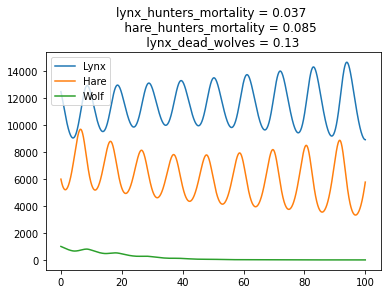

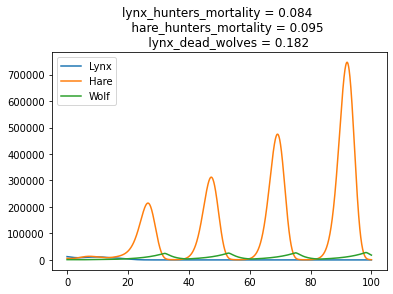

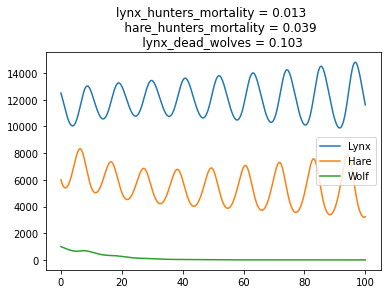

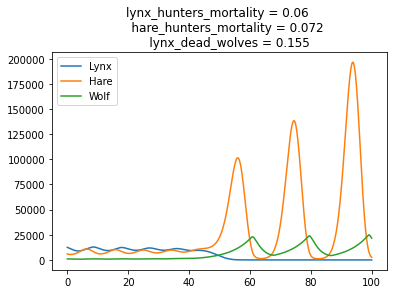

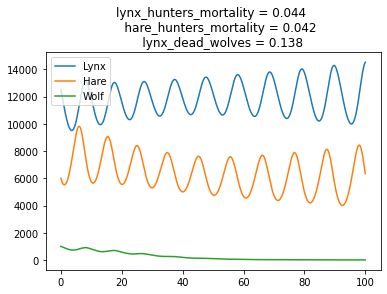

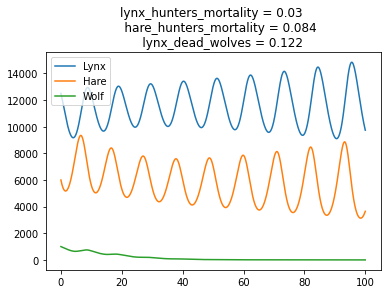

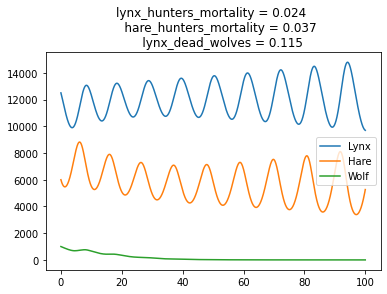

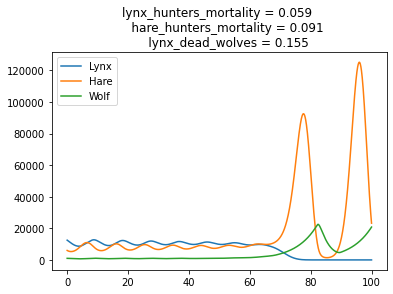

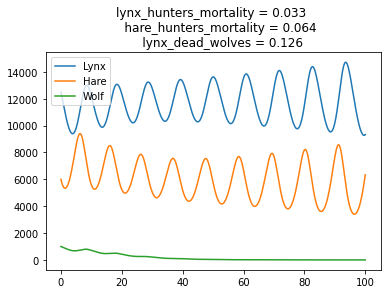

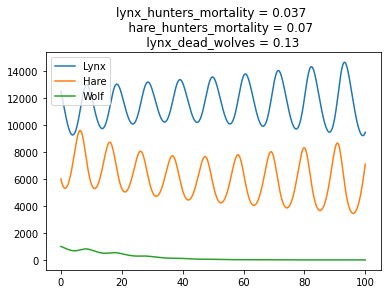

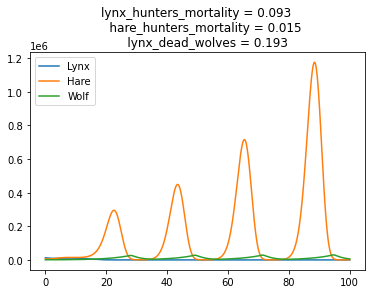

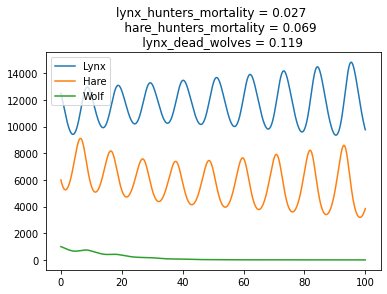

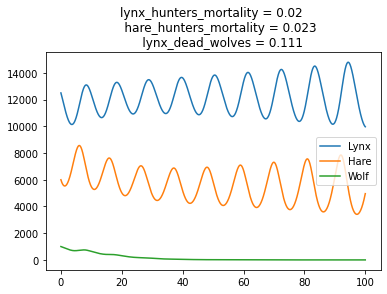

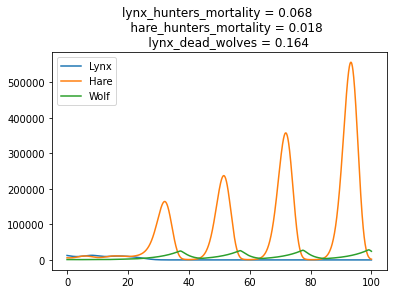

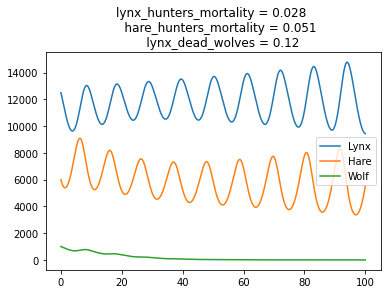

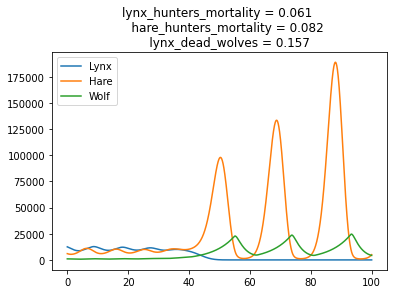

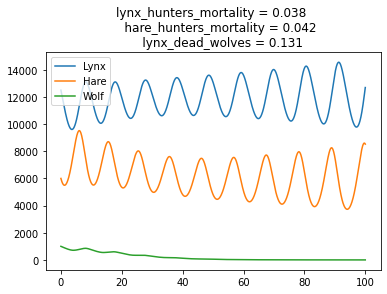

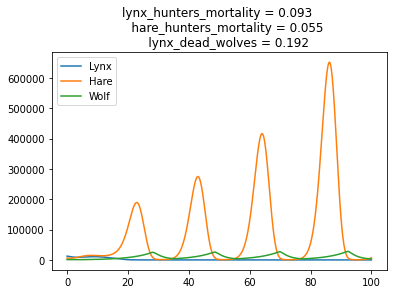

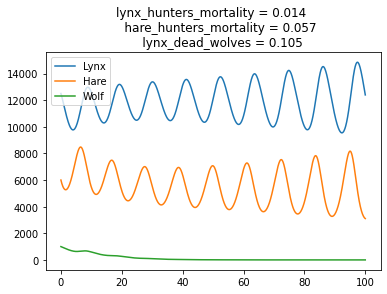

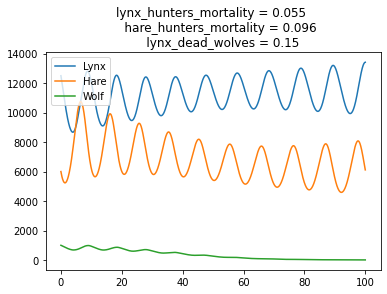

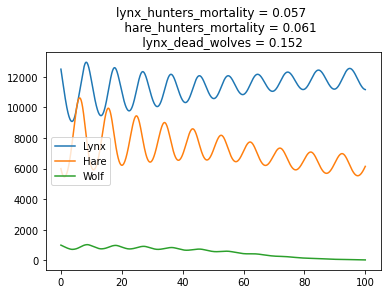

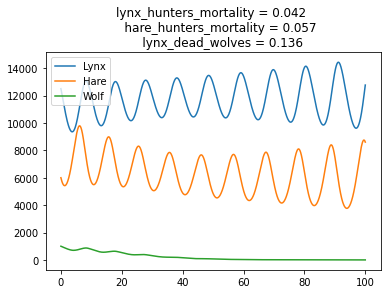

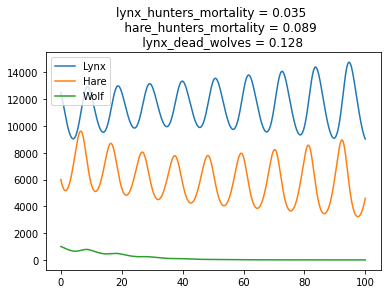

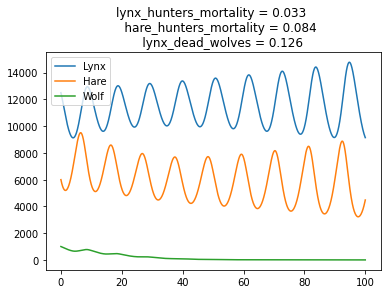

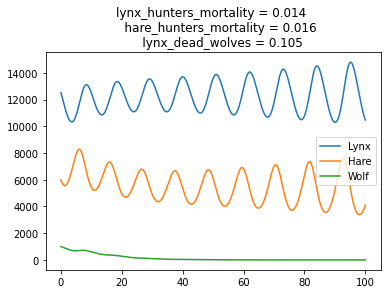

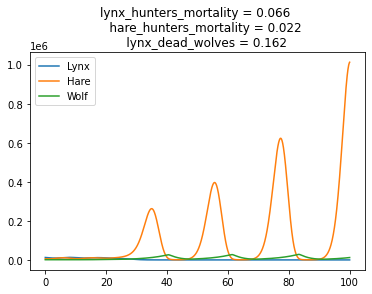

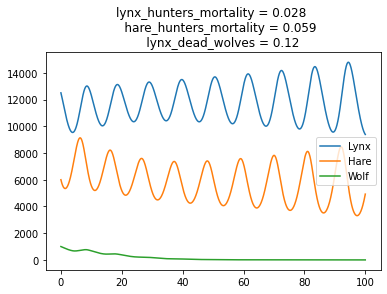

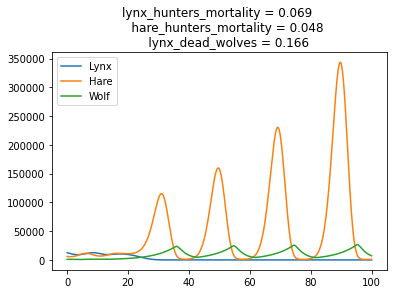

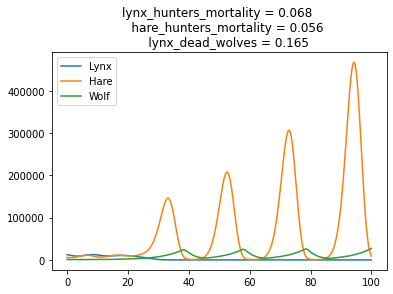

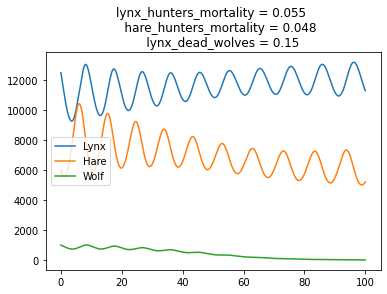

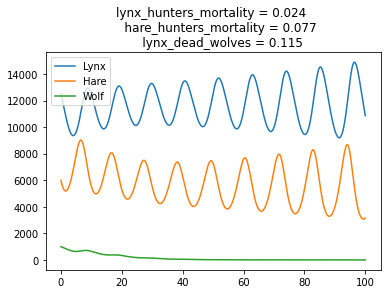

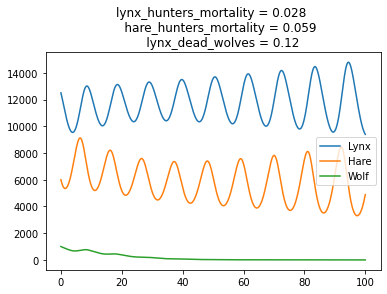

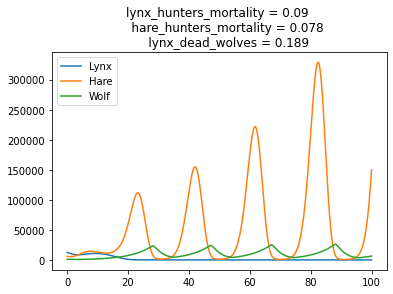

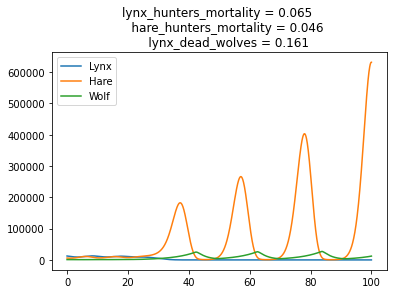

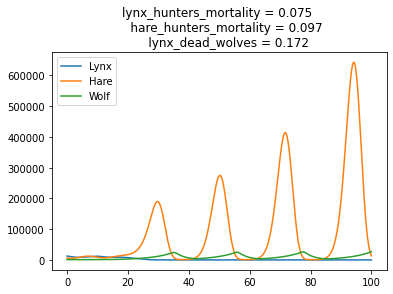

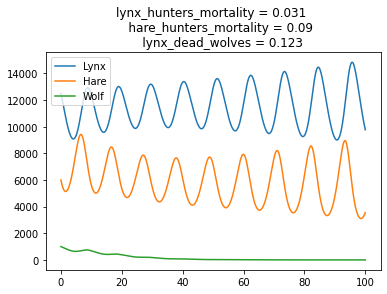

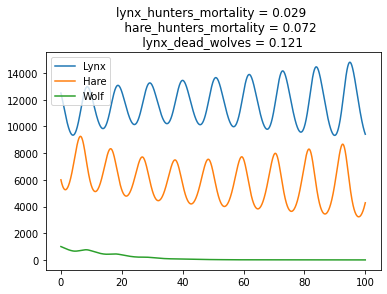

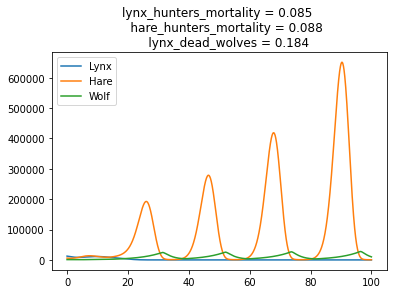

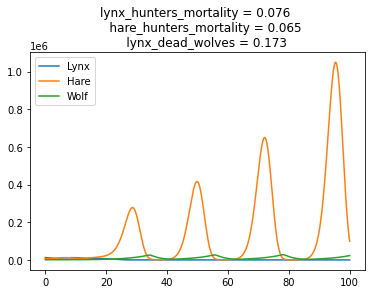

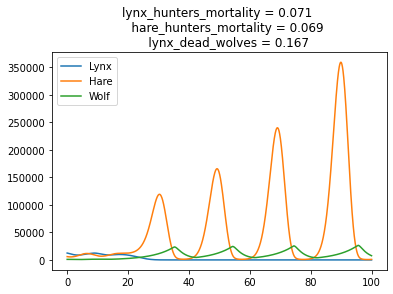

Calculation is finished. 
Mean = 63.6905 
Standart deviation = 58.1769



In [3]:
lynx_100 = []

min_iter = 10
max_iter = 100
alpha = 0.05

for i in tqdm(range(max_iter)):
    
    np.random.seed(i) # seting seed for same results
    q1 = np.random.uniform(0.01, 0.1)
    np.random.seed(i+max_iter)
    q2 = np.random.uniform(0.01, 0.1)
    np.random.seed(i)
    r = np.random.uniform(0.1, 0.2)

    output = model.run(params={"initial_wolf_population": 10, 'wolf_natality': 0.15,
                               'lynx_hunters_mortality': q1, 'hare_hunters_mortality': q2, 'lynx_dead_wolves': r}, 
               return_columns=['Lynx', 'Hare', 'Wolf'])
    output['Lynx'] = output['Lynx'] * 100
    output['Wolf'] = output['Wolf'] * 100

    output.plot()
    plt.title(f'lynx_hunters_mortality = {np.round(q1, 3)} \n \
    hare_hunters_mortality = {np.round(q2, 3)} \n \
    lynx_dead_wolves = {np.round(r, 3)}')
    plt.show()

    if i < min_iter:
        lynx_100.append(output['Lynx'].values[-1] / 100)
        continue 
        
    _, p_value = ttest_1samp(lynx_100, 0)

    if 1 - p_value <= alpha:
        mean = np.round(np.mean(lynx_100), 4)
        std = np.round(np.std(lynx_100), 4)
        print(f'Calculation is finished. \nMean = {mean} \nStandart deviation = {std}')
        break
        
    lynx_100.append(output['Lynx'].values[-1] / 100)
    
    if i == max_iter-1: 
        mean = np.round(np.mean(lynx_100), 4)
        std = np.round(np.std(lynx_100), 4)
        print(f'Calculation is finished. \nMean = {mean} \nStandart deviation = {std}')

In [4]:
max_iter = 50
min_iter = 10

means = [[], [], [], []]
stds = [[], [], [], []]

for l_num, initial_wolf_population in enumerate([5, 10, 40, 120]):
    for wolf_natality in tqdm([0.01, 0.05, 0.1, 0.2, 0.4]):
        
        lynx_100 = []
        
        for i in range(max_iter):

            np.random.seed(i) # seting seed for same results
            q1 = np.random.uniform(0.01, 0.1)
            np.random.seed(i+max_iter)
            q2 = np.random.uniform(0.01, 0.1)
            np.random.seed(i)
            r = np.random.uniform(0.1, 0.2)

            output = model.run(params={"initial_wolf_population": initial_wolf_population, 'wolf_natality': wolf_natality,
                                       'lynx_hunters_mortality': q1, 'hare_hunters_mortality': q2, 'lynx_dead_wolves': r}, 
                       return_columns=['Lynx', 'Hare', 'Wolf'])
            
            if i < min_iter:
                lynx_100.append(output['Lynx'].values[-1])
                continue 

            _, p_value = ttest_1samp(lynx_100, 0)

            if 1 - p_value <= alpha:
                
                mean = np.round(np.mean(lynx_100), 4)
                std = np.round(np.std(lynx_100), 4)
                
                means[l_num].append(mean)
                stds[l_num].append(std)
                
                break

            lynx_100.append(output['Lynx'].values[-1])

            if i == max_iter-1: 
                
                mean = np.round(np.mean(lynx_100), 4)
                std = np.round(np.std(lynx_100), 4)
                
                means[l_num].append(mean)
                stds[l_num].append(std)

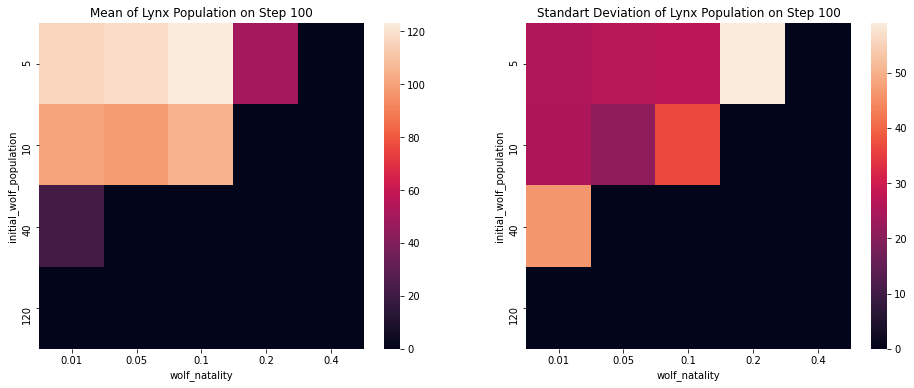

In [7]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
heatmap(pd.DataFrame(means), yticklabels=[5, 10, 40, 120], xticklabels=[0.01, 0.05, 0.1, 0.2, 0.4])
plt.ylabel('initial_wolf_population')
plt.xlabel('wolf_natality')
plt.title('Mean of Lynx Population on Step 100')
plt.subplot(1, 2, 2)
heatmap(pd.DataFrame(stds), yticklabels=[5, 10, 40, 120], xticklabels=[0.01, 0.05, 0.1, 0.2, 0.4])
plt.ylabel('initial_wolf_population')
plt.xlabel('wolf_natality')
plt.title('Standart Deviation of Lynx Population on Step 100')
plt.show()

**There are some initial values, which lead to extinction of the lynx species**